In [1]:
import pandas as pd
import numpy as np
import glob
from os import path as op
import os
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
location = glob.glob("Z:/elekin/02-RESULTADOS/output/preproc/cbl/*/cbl_extracted_ts.csv")
files = list(location)
timeseries = []
for i, f in enumerate(files):
    #print(i,f)
    df = pd.read_csv(f, header=None)
    df['id'] = f[43: 47]
    #print(df.shape)
    timeseries.append(df)
frame = pd.concat(timeseries, ignore_index=False)

In [3]:
ct = pd.read_csv("control.txt")
et = pd.read_csv("et.txt")
ct.shape, et.shape

((52, 1), (52, 1))

In [4]:
#No pending CTs
mct = pd.DataFrame(pd.unique(frame.merge(ct)['id']))
mct.columns = ["id"]
pd.concat([ct, mct]).drop_duplicates(['id'], keep=False)

,id


In [5]:
h5_file = 'Z:/elekin/02-RESULTADOS/00-EXTRACCION-CEREBELO/elekin_fmri_ts_pandas.hdf5'
key = 'cbl/ct'
frame.merge(ct).to_hdf(h5_file, key)

C:\Users\isancmen\AppData\Local\Continuum\anaconda3\envs\pyrestfmri\lib\site-packages\pandas\io\pytables.py:278: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  f(store)


In [6]:
#Pending ETs
met = pd.DataFrame(pd.unique(frame.merge(et)['id']))
met.columns = ["id"]
pd.concat([et, met]).drop_duplicates(['id'], keep=False)

,id


In [7]:
h5_file = 'Z:/elekin/02-RESULTADOS/00-EXTRACCION-CEREBELO/elekin_fmri_ts_pandas.hdf5'
key = 'cbl/et'
frame.merge(et).to_hdf(h5_file, key)

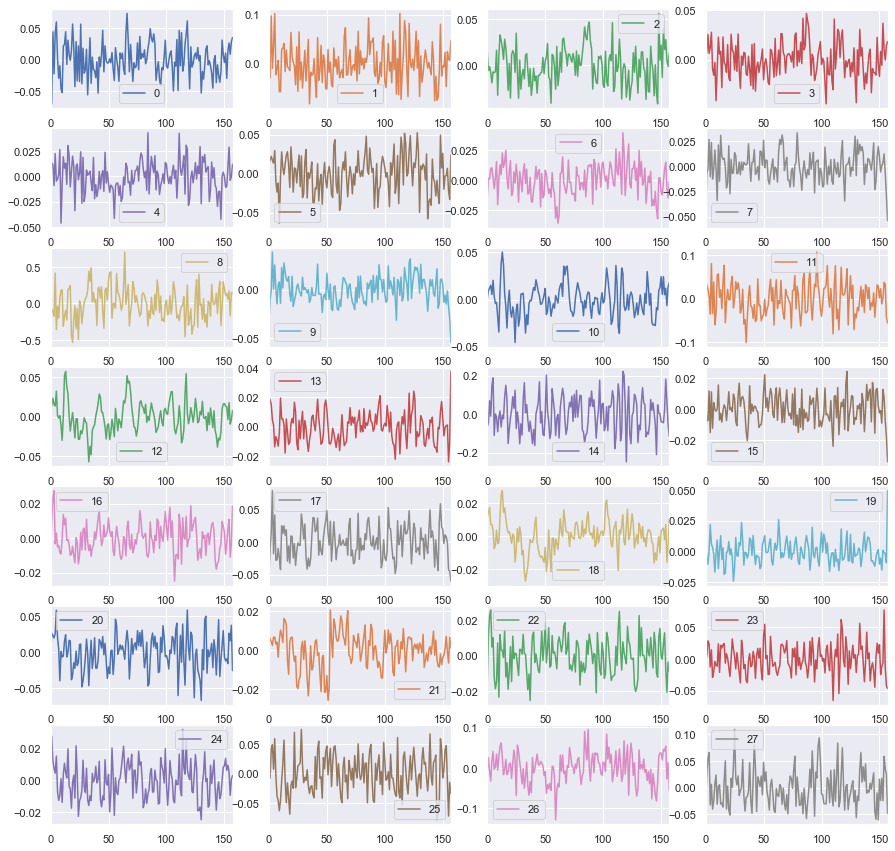

In [9]:
subj = "C528"
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(15,15))
df = frame.loc[:,frame.columns != 'label']
p = df[df["id"] == subj].plot(subplots=True, ax=axes, fig=fig)